In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [99]:
df = pd.read_csv("candidatos_info_politica.csv", sep=';')

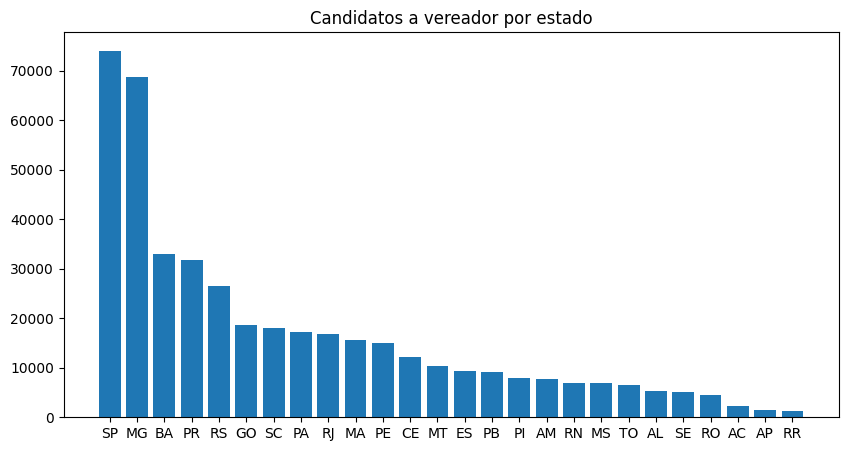

In [100]:
df_candidatos_vereador = df[df["DS_CARGO"]== "VEREADOR"]
df_candidatos_vereador_by_uf = df_candidatos_vereador[["SG_UF", "NM_URNA_CANDIDATO"]].groupby(["SG_UF"]).count()
df_candidatos_vereador_by_uf = df_candidatos_vereador_by_uf.sort_values(by="NM_URNA_CANDIDATO", ascending=False)
fig = plt.figure(figsize = (10, 5))
plt.bar(df_candidatos_vereador_by_uf.index, df_candidatos_vereador_by_uf["NM_URNA_CANDIDATO"], width=0.8)
plt.title("Candidatos a vereador por estado")
plt.show()

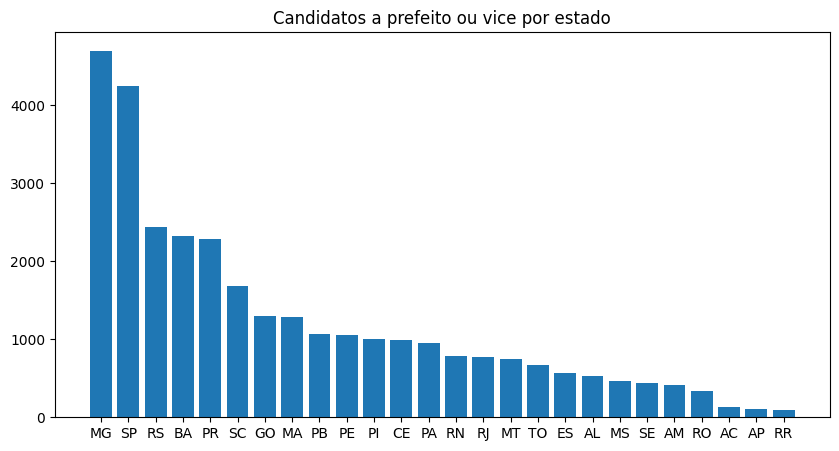

In [101]:
df_candidatos_prefeito_vice = df[df["DS_CARGO"] != "VEREADOR"]
df_candidatos_prefeitura_by_uf = df_candidatos_prefeito_vice[["SG_UF", "NM_URNA_CANDIDATO"]].groupby(["SG_UF"]).count()
df_candidatos_prefeitura_by_uf = df_candidatos_prefeitura_by_uf.sort_values(by="NM_URNA_CANDIDATO", ascending=False)
fig = plt.figure(figsize = (10, 5))
plt.bar(df_candidatos_prefeitura_by_uf.index, df_candidatos_prefeitura_by_uf["NM_URNA_CANDIDATO"], width=0.8)
plt.title("Candidatos a prefeito ou vice por estado")
plt.show()

In [102]:
populcacao_por_estados = pd.read_csv("população_estados.csv", sep=";") # Nomes de arquivos não deveriam ter ã ç 
df_candidatos_vereador_by_uf = df_candidatos_vereador_by_uf.merge(populcacao_por_estados, on="SG_UF")

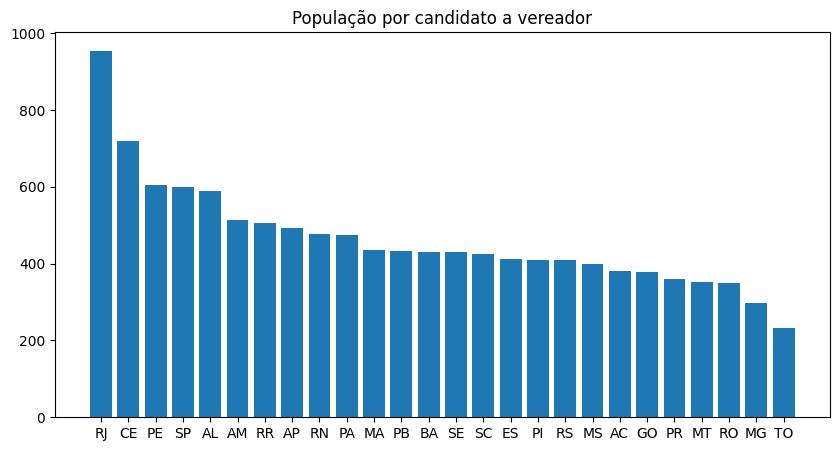

In [103]:
df_candidatos_vereador_by_uf["POP_CANDIDATO"] = df_candidatos_vereador_by_uf["POPULACAO"]/df_candidatos_vereador_by_uf["NM_URNA_CANDIDATO"]
df_candidatos_vereador_by_uf = candidatos_vereador_uf.sort_values(by="POP_CANDIDATO", ascending=False)
plt.figure(figsize=(10, 5))
plt.bar(df_candidatos_vereador_by_uf["SG_UF"], df_candidatos_vereador_by_uf["POP_CANDIDATO"])
plt.title("População por candidato a vereador")
plt.show()

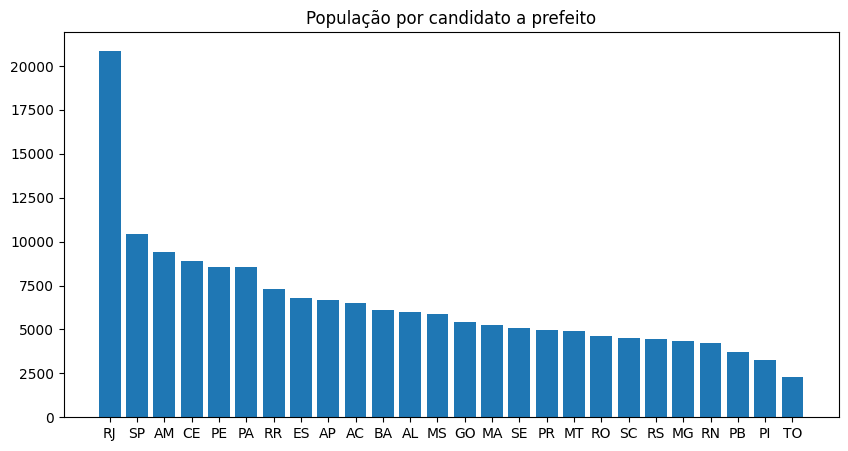

In [104]:
df_candidatos_prefeitura_by_uf = df_candidatos_prefeitura_by_uf.merge(populcacao_por_estados, on="SG_UF")
df_candidatos_prefeitura_by_uf["POP_CANDIDATO"] = df_candidatos_prefeitura_by_uf["POPULACAO"]/df_candidatos_prefeitura_by_uf["NM_URNA_CANDIDATO"]
df_candidatos_prefeitura_by_uf = df_candidatos_prefeitura_by_uf.sort_values(by="POP_CANDIDATO", ascending=False)
plt.figure(figsize=(10, 5))
plt.bar(df_candidatos_prefeitura_by_uf["SG_UF"], df_candidatos_prefeitura_by_uf["POP_CANDIDATO"])
plt.title("População por candidato a prefeito")
plt.show()

In [155]:
df_pop_grandes_cidades = pd.read_csv("populacao_grandes_cidades.csv", sep=";")
df_pop_grandes_cidades["CIDADE"] = df_pop_grandes_cidades["CIDADE"].apply(lambda x : x.upper())
df_pop_grandes_cidades

,CIDADE,POPULACAO
0,SÃO PAULO,11451999
1,RIO DE JANEIRO,6211223
2,BRASÍLIA,2817381
3,FORTALEZA,2428708
4,SALVADOR,2417678
...,...,...
314,MANACAPURU,101883
315,BALSAS,101767
316,LAGARTO,101579
317,ASSIS,101409


In [174]:
lista_de_cidades = list(df_pop_grandes_cidades["CIDADE"])
df_cand_vereador_grandes_cidades = df_candidatos_vereador[df_candidatos_vereador["NM_UE"].isin(lista_de_cidades)]\
[["NM_UE", "NM_URNA_CANDIDATO"]].groupby(["NM_UE"]).count()
df_cand_vereador_grandes_cidades = df_pop_grandes_cidades.merge(df_cand_vereador_grandes_cidades, left_on="CIDADE", right_on="NM_UE")
df_cand_vereador_grandes_cidades["POP_CANDIDATO"] = df_cand_vereador_grandes_cidades["POPULACAO"]/df_cand_vereador_grandes_cidades["NM_URNA_CANDIDATO"]
df_cand_vereador_grandes_cidades = df_cand_vereador_grandes_cidades.sort_values(by="POP_CANDIDATO", ascending=False)
df_cand_vereador_grandes_cidades

,CIDADE,POPULACAO,NM_URNA_CANDIDATO,POP_CANDIDATO
0,SÃO PAULO,11451999,1016,11271.652559
1,RIO DE JANEIRO,6211223,1028,6042.045720
2,FORTALEZA,2428708,771,3150.075227
14,MACEIÓ,957916,314,3050.687898
7,RECIFE,1488920,519,2868.824663
...,...,...,...,...
263,FORMOSA,115901,323,358.826625
283,PAULÍNIA,110537,313,353.153355
312,ITUIUTABA,102217,292,350.058219
199,SANTA RITA,149910,433,346.212471


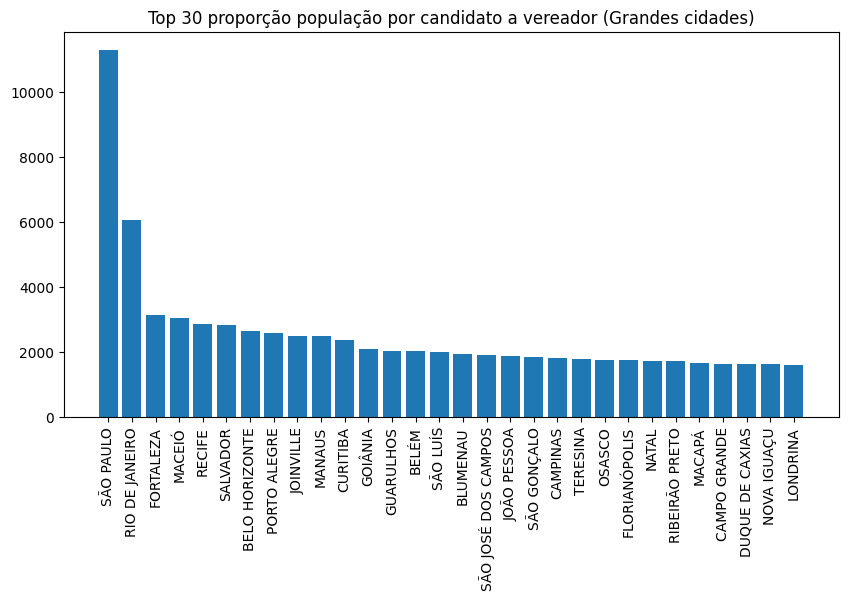

In [177]:
plt.figure(figsize=(10, 5))
plt.bar(df_cand_vereador_grandes_cidades.iloc[0:30]["CIDADE"], df_cand_vereador_grandes_cidades.iloc[0:30]["POP_CANDIDATO"])
plt.title("Top 30 proporção população por candidato a vereador (Grandes cidades)")
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(df_cand_vereador_grandes_cidades.iloc[-30:]["CIDADE"], df_cand_vereador_grandes_cidades.iloc[0:30]["POP_CANDIDATO"])
plt.title("Top 30 proporção população por candidato a vereador (Grandes cidades)")
plt.xticks(rotation=90)
plt.show()